## Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [2]:
database_base_path = '/kaggle/input/siim-isic-melanoma-classification/'
train = pd.read_csv(database_base_path + 'train.csv')
test = pd.read_csv(database_base_path + 'test.csv')

print('Train samples: %d' % len(train))
display(train.head())
print('Test samples: %d' % len(test))
display(test.head())

Train samples: 33126


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


Test samples: 10982


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


# Meta features EDA

In [3]:
print('Train set missing values')
display(pd.DataFrame(train.isnull().sum(), columns=['Null count']))

print('Test set missing values')
display(pd.DataFrame(test.isnull().sum(), columns=['Null count']))

Train set missing values


,Null count
image_name,0
patient_id,0
sex,65
age_approx,68
anatom_site_general_challenge,527
diagnosis,0
benign_malignant,0
target,0


Test set missing values


,Null count
image_name,0
patient_id,0
sex,0
age_approx,0
anatom_site_general_challenge,351


# Numerical features distribution

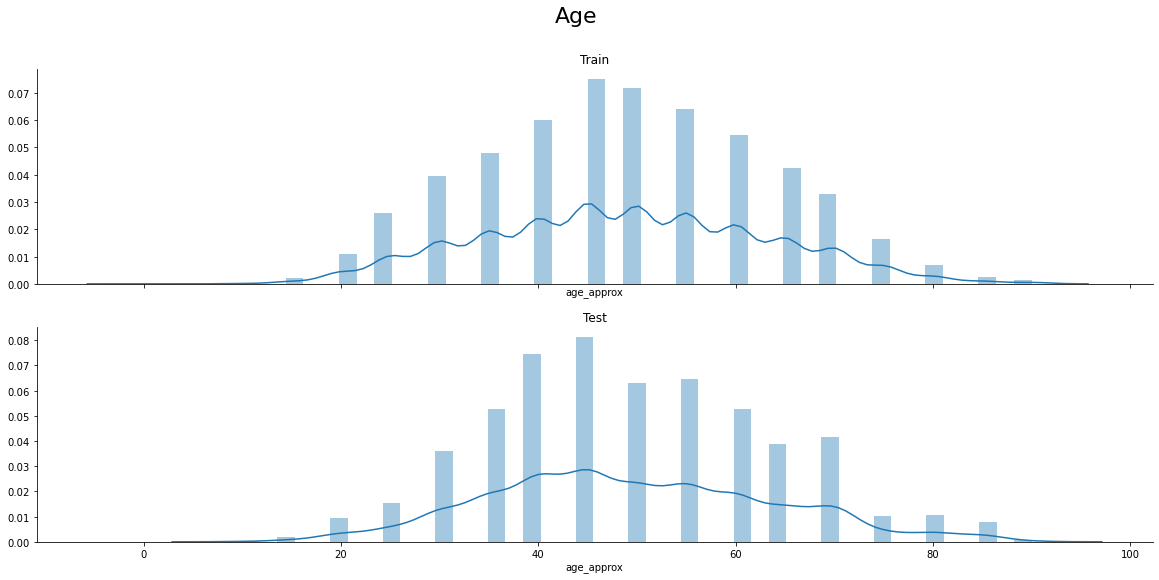

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8.7), sharex=True)
fig.suptitle('Age', fontsize=22)
sns.distplot(train['age_approx'], ax=ax1).set_title('Train')
sns.distplot(test['age_approx'], ax=ax2).set_title('Test')
sns.despine()
plt.show()

# Categorical features distribution

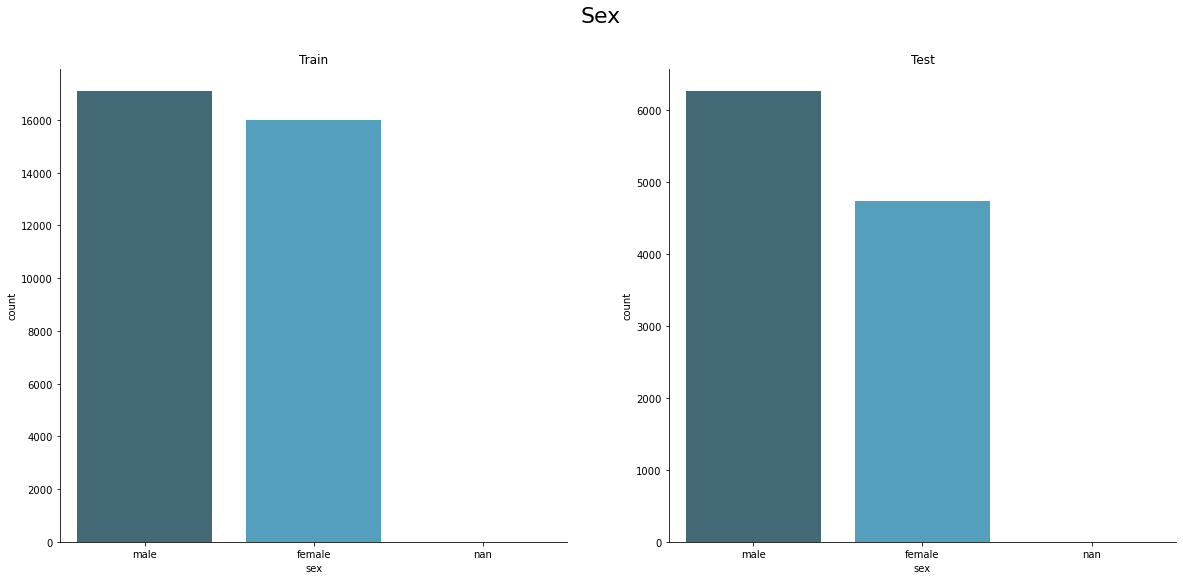

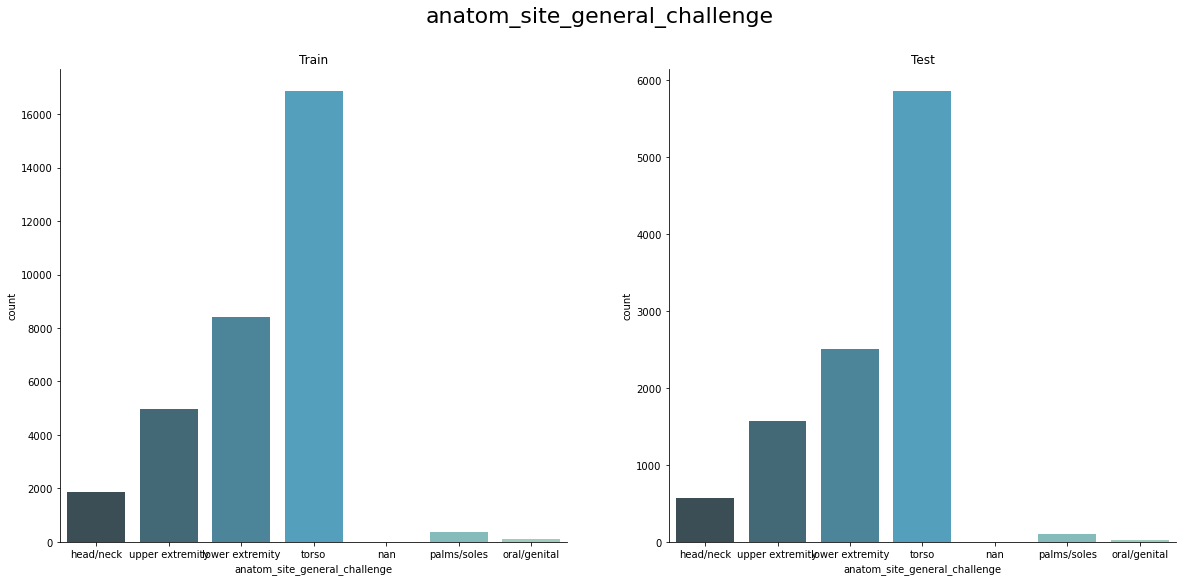

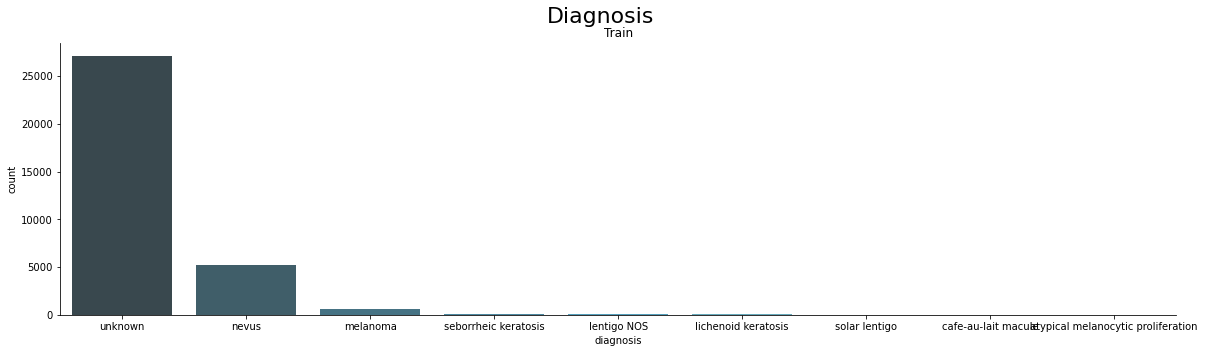

In [5]:
sex_cols = train['sex'].unique()
anatom_cols = train['anatom_site_general_challenge'].unique()
diagnosis_cols = train['diagnosis'].unique()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8.7))
fig.suptitle('Sex', fontsize=22)    
sns.countplot(x='sex', data=train, palette='GnBu_d', order=sex_cols, ax=ax1).set_title('Train')
sns.countplot(x='sex', data=test, palette='GnBu_d', order=sex_cols, ax=ax2).set_title('Test')
sns.despine()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8.7))
fig.suptitle('anatom_site_general_challenge', fontsize=22)    
sns.countplot(x='anatom_site_general_challenge', data=train, palette='GnBu_d', order=anatom_cols, ax=ax1).set_title('Train')
sns.countplot(x='anatom_site_general_challenge', data=test, palette='GnBu_d', order=anatom_cols, ax=ax2).set_title('Test')
sns.despine()
plt.show()

fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))
fig.suptitle('Diagnosis', fontsize=22)    
sns.countplot(x='diagnosis', data=train, palette='GnBu_d', order=diagnosis_cols, ax=ax1).set_title('Train')
sns.despine()
plt.show()

# Target correlation

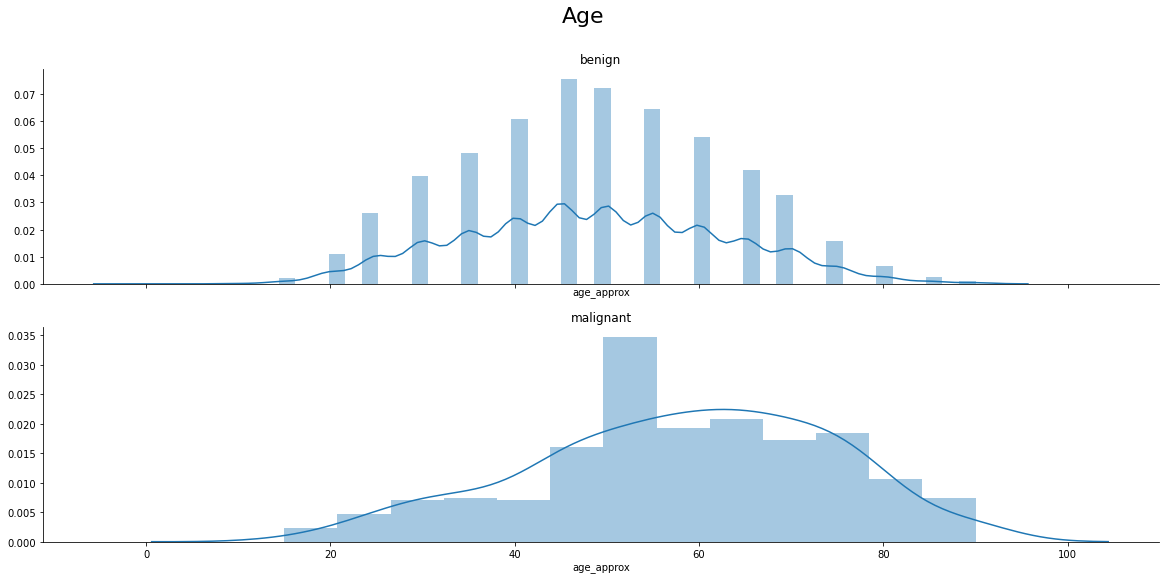

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8.7), sharex=True)
fig.suptitle('Age', fontsize=22)
sns.distplot(train[train['target'] == 0]['age_approx'], ax=ax1).set_title('benign')
sns.distplot(train[train['target'] == 1]['age_approx'], ax=ax2).set_title('malignant')
sns.despine()
plt.show()

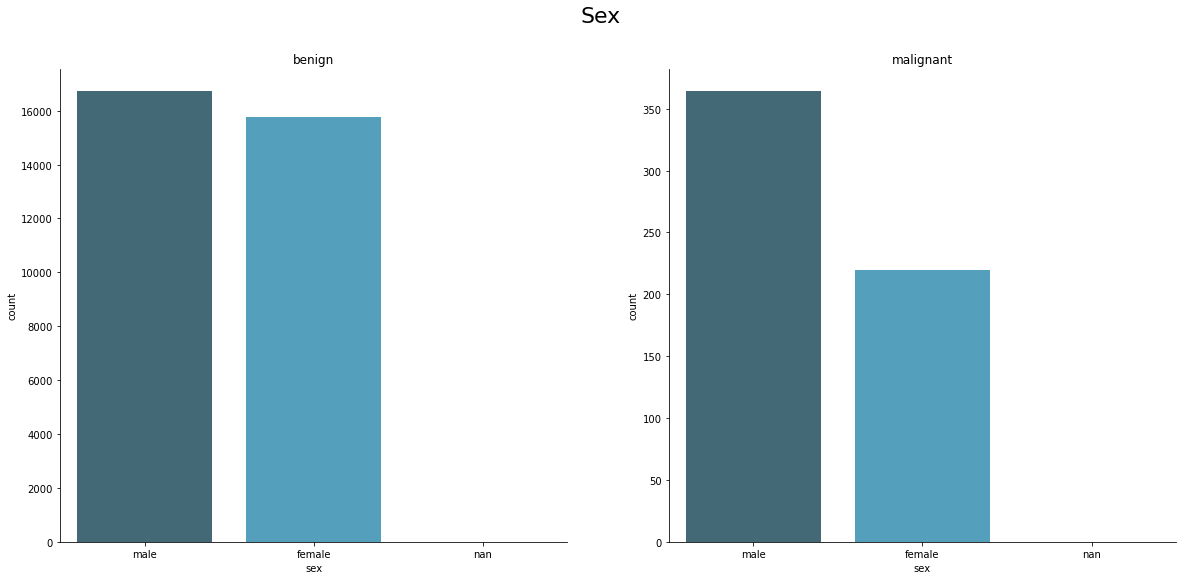

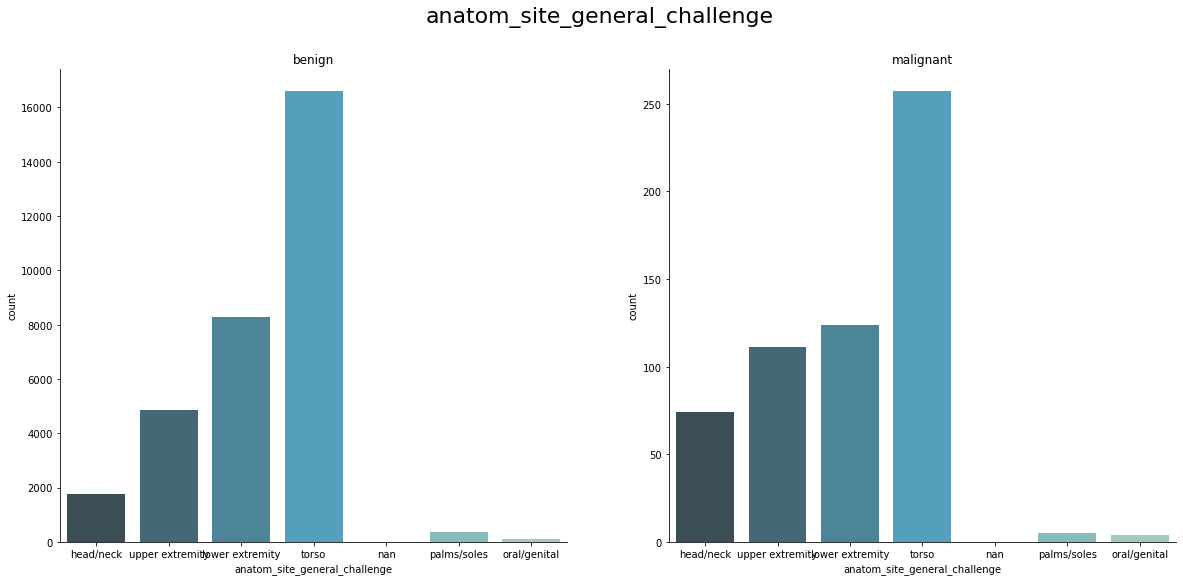

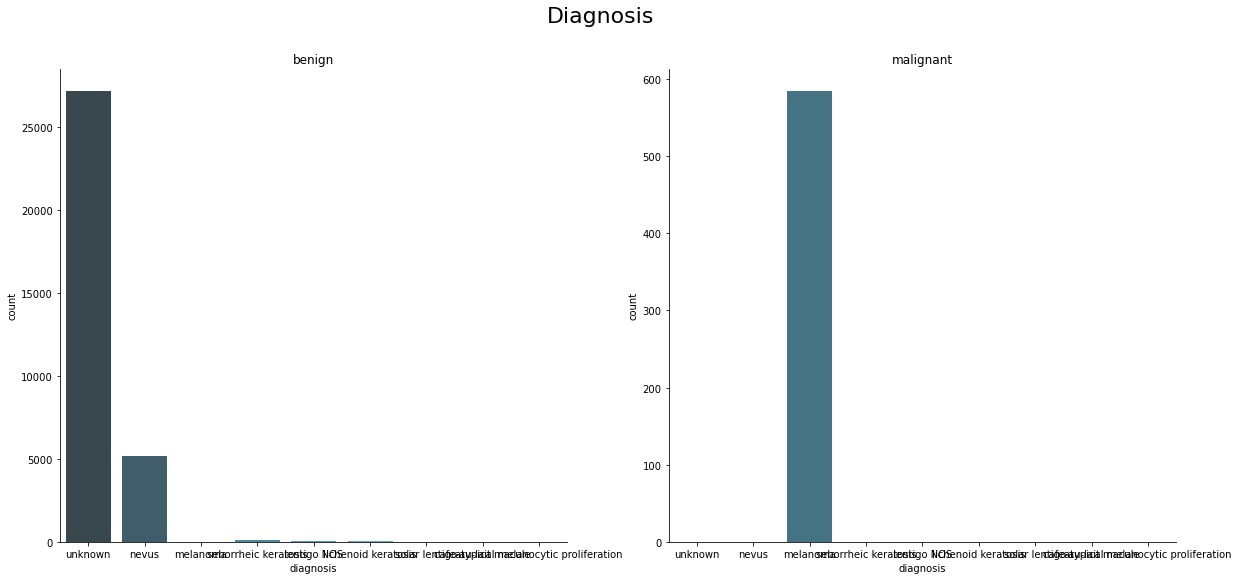

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8.7))
fig.suptitle('Sex', fontsize=22)    
sns.countplot(x='sex', data=train[train['target'] == 0], palette='GnBu_d', order=sex_cols, ax=ax1).set_title('benign')
sns.countplot(x='sex', data=train[train['target'] == 1], palette='GnBu_d', order=sex_cols, ax=ax2).set_title('malignant')
sns.despine()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8.7))
fig.suptitle('anatom_site_general_challenge', fontsize=22)    
sns.countplot(x='anatom_site_general_challenge', data=train[train['target'] == 0], palette='GnBu_d', order=anatom_cols, ax=ax1).set_title('benign')
sns.countplot(x='anatom_site_general_challenge', data=train[train['target'] == 1], palette='GnBu_d', order=anatom_cols, ax=ax2).set_title('malignant')
sns.despine()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8.7))
fig.suptitle('Diagnosis', fontsize=22)    
sns.countplot(x='diagnosis', data=train[train['target'] == 0], palette='GnBu_d', order=diagnosis_cols, ax=ax1).set_title('benign')
sns.countplot(x='diagnosis', data=train[train['target'] == 1], palette='GnBu_d', order=diagnosis_cols, ax=ax2).set_title('malignant')
sns.despine()
plt.show()